In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
sns.set(font_scale=1.5, style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 9)

In [2]:
def preprocess_spectra(df, average=15):
    df = average_dataframe(df).transpose()
    nm = [str(int(x)) for x in df.iloc[0]]
    df = df.drop("Wavelengths", 0)
    df.columns = nm
    average_df = pd.DataFrame()
    for i in range((df.shape[0]) // average):
        average_df[i] = df.iloc[i*average:(i+1)*average,:].mean(axis=0)
    return average_df.transpose()

def average_dataframe(df, n=15):
    # Separate label column from data
    label = df.iloc[:,0]
    df = df.iloc[:,1:]

    if (df.shape[1]) % n != 0:
        raise Exception("Number of columns: {}. Not divisible by {}.".format(df.shape[1], n))

    # Average every N columns
    average_df = pd.DataFrame()
    average_df["Wavelengths"] = label
    for i in range((df.shape[1]) // n):
        average_df[i] = df.iloc[:,i*n:(i+1)*n].mean(axis=1)

    return average_df

In [3]:
gt = pd.read_csv("../data/Spreadsheet/Orange/orange.csv")

In [4]:
gt = gt[gt["ID"] != "10H"]
gt = gt[gt["ID"] != "60G"]
gt = gt.reset_index().drop(["index"], axis=1)
print(gt)

     ID  Chlorophyll      NDVI         WP
0   14E    45.130000  0.790624  -8.498000
1   57B    53.224000  0.822390  -7.544000
2   22E    63.525000  0.866294  -8.279000
3   51F    61.880000  0.871767  -9.449000
4   26B    62.204000  0.870519  -9.310000
5   27B    59.644000  0.865260  -9.920000
6   22D    62.715000  0.832815  -9.831000
7   25C    31.651000  0.721480  -8.988000
8   27D    59.701000  0.831225        NaN
9   28D    56.944000  0.825955        NaN
10  27C    62.460000  0.839820  -9.650000
11  33B    55.245000  0.793062  -9.026000
12  34B    49.554000  0.772604  -8.904000
13  35B    47.453000  0.694674 -11.478000
14  35C    56.900000  0.786387  -6.965714
15  36B    37.940000  0.747801 -12.092000
16  37C    44.990000  0.785335 -10.458000
17  38B    56.520000  0.826345  -7.810000
18  38C    46.100000  0.785533  -9.496000
19  39C    31.870000  0.732888 -12.341000
20  41B    62.086667  0.842104  -8.914286
21  42C    70.220000  0.803431  -8.802000
22  43C    56.526667  0.845919  -9

In [5]:
spectra_08_17 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-08-17.csv"), 20)
spectra_08_24 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-08-24.csv"), 20)
spectra_08_29 = None # Two trees missing
spectra_09_05 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-09-05.csv"), 20)
spectra_09_14 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-09-14.csv"), 20)
spectra_09_22 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-09-22.csv"), 20)
spectra_09_29 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-09-29.csv"), 10)
spectra_10_04 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-04.csv"), 15)
spectra_10_11 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-11.csv"), 15)
spectra_10_18 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-18.csv"), 15)
spectra_10_25 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-25.csv"), 15)
spectra_11_01 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-01.csv"), 15)
spectra_11_08 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-08.csv"), 15)
spectra_11_15 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-15.csv"), 15)
spectra_12_06 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-12-06.csv"), 15)
spectra_12_13 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-12-13.csv"), 15)
spectra_02_22 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2018-02-22.csv"), 15)
spectra_03_01 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2018-03-01.csv"), 15)
spectra_03_08 = preprocess_spectra(pd.read_csv("../data/Unprocessed/2018-03-08.csv"), 15)

In [6]:
spectra = pd.concat([
spectra_08_17,
spectra_08_24,
spectra_09_05,
spectra_09_14,
spectra_09_22,
spectra_09_29,
spectra_10_04,
spectra_10_11,
spectra_10_18,
spectra_10_25,
spectra_11_01,
spectra_11_08,
spectra_11_15,
spectra_12_06,
spectra_12_13,
spectra_02_22,
spectra_03_01,
spectra_03_08,
])
 
spectra = spectra.reset_index().drop(["index"], axis=1)
spectra.shape

(92, 751)

In [7]:
print(gt.shape, spectra.shape)
df = pd.concat([gt, spectra], axis=1).dropna()
df

(92, 4) (92, 751)


,ID,Chlorophyll,NDVI,WP,325,326,327,328,329,330,...,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075
0,14E,45.130000,0.790624,-8.498000,0.247807,0.316400,0.233957,0.178481,0.190137,0.228220,...,0.727682,0.736823,0.743748,0.740633,0.731977,0.724031,0.722389,0.723590,0.727472,0.734888
1,57B,53.224000,0.822390,-7.544000,0.255231,0.324505,0.238149,0.183649,0.200825,0.235109,...,0.743627,0.751961,0.758429,0.755902,0.747053,0.738716,0.737170,0.738427,0.742455,0.750420
2,22E,63.525000,0.866294,-8.279000,0.378899,0.372531,0.432389,0.399687,0.264714,0.280601,...,0.824614,0.813246,0.809844,0.823482,0.818668,0.807886,0.805975,0.806092,0.807975,0.812397
3,51F,61.880000,0.871767,-9.449000,0.368845,0.369458,0.419764,0.382478,0.254803,0.269473,...,0.814762,0.803922,0.800731,0.813733,0.808936,0.798431,0.796566,0.796777,0.798809,0.803397
4,26B,62.204000,0.870519,-9.310000,0.316933,0.295542,0.265562,0.237319,0.218289,0.224577,...,0.802654,0.799524,0.795944,0.797259,0.798094,0.797158,0.793959,0.792721,0.793118,0.793329
5,27B,59.644000,0.865260,-9.920000,0.253288,0.216841,0.266548,0.259724,0.184626,0.191028,...,0.824868,0.827543,0.828755,0.825216,0.823594,0.821110,0.815464,0.815605,0.819007,0.819581
6,22D,62.715000,0.832815,-9.831000,0.171660,0.165923,0.205523,0.211827,0.178850,0.154673,...,0.741073,0.738477,0.731943,0.725462,0.728604,0.733623,0.732423,0.730169,0.727609,0.724842
7,25C,31.651000,0.721480,-8.988000,0.277856,0.196039,0.228383,0.248858,0.238498,0.217208,...,0.770215,0.767824,0.763103,0.760404,0.759091,0.758842,0.759149,0.758396,0.758598,0.763119
10,27C,62.460000,0.839820,-9.650000,0.233326,0.238165,0.222847,0.232413,0.265204,0.288514,...,0.752024,0.745963,0.747644,0.759374,0.757702,0.753887,0.759440,0.759309,0.756398,0.758946
11,33B,55.245000,0.793062,-9.026000,0.259444,0.259996,0.250174,0.254241,0.273439,0.301286,...,0.750561,0.745069,0.747300,0.759410,0.757749,0.753780,0.759256,0.759387,0.756760,0.759074


In [8]:
df["WBI"] = df["970"] / df["900"]

In [19]:
print("WBI & WP:", stats.pearsonr(df["WBI"][-6:], df["WP"][-6:])[0])
print("WBI & Chlorophyll:", stats.pearsonr(df["WBI"], df["Chlorophyll"])[0])

WBI & WP: 0.32039844271
WBI & Chlorophyll: -0.107541929085


In [20]:
def create_scatter(x, y, x_title, y_title):
    fig = plt.figure()
    sns.regplot(x=x, y=y, fit_reg=False, label="big")
    plt.xlabel(x_title)
    plt.ylabel(y_title)

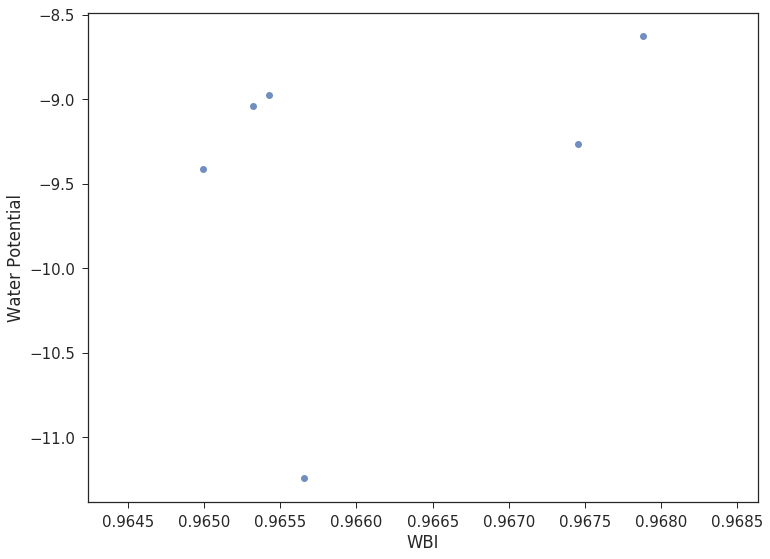

In [21]:
create_scatter(df["WBI"][-6:], df["WP"][-6:], "WBI", "Water Potential")